Negin Mohtaram: 98102238
Zahra Sorkhei: 98101725
Ali Nourain: 98102527

# Set MSCTD Configurations

In [2]:
!pip install --upgrade --no-cache-dir gdown
!pip3 install --upgrade gdown
!pip install -U --no-cache-dir gdown --pre
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/XL2248/MSCTD

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 19.83 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Checking out files: 100% (934/934), done.


In [4]:
!cp MSCTD/MSCTD_data/ende/english_*.txt .
!cp MSCTD/MSCTD_data/ende/image_index_*.txt .
!cp MSCTD/MSCTD_data/ende/sentiment*.txt .

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries

In [7]:
import torch
from torchvision import transforms
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2

# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from IPython.display import clear_output 

# Create Data Loader Class

In [8]:
class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, path_label, path_sentiment, path_dialoges, drive_id, mode,transform):
    'Initialization'
    self.path_label = path_label
    self.path_sentiment = path_sentiment
    self.path_dialoges = path_dialoges
    self.drive_id = drive_id
    self.mode = mode
    self.load_images()
    self.labels = np. asarray(self.read_txt(path_label)[:-1])
    self.indexes = np. asarray(self.conversations_index()[:-1])
    self.dialoges = np. asarray(self.read_txt(path_dialoges)[:-1])
    self.transform = transform
    self.convertType()
  def __len__(self):
    'Denotes the total number of samples'
    return len(self.labels)

  def __getitem__(self, index):
    'Generates one sample of data'
    image_index = self.get_image(index)
    dialoge_index = self.dialoges[index]
    label_index = self.labels[index]
    return image_index, dialoge_index, label_index
  
  def read_txt(self, path_text):
    'Reads text and turn them into a list'
    my_file = open(path_text, "r")
    data = my_file.read()
    data_into_list = data.split("\n")
    return data_into_list

  def load_images(self):
    'download images'
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file_id = self.drive_id
    file_path = './DLproject'
    if not os.path.exists(file_path):
        os.makedirs(file_path)
    path_zip = '/content/' + self.mode + '.zip'
    !gdown --id "$file_id"
    !unzip "$path_zip" -d '/content/DLproject/'

  def get_image(self, index):
    file_name = '/content/DLproject/'+ self.mode + '//'+ str(index) + '.jpg'
    image = cv2.imread(file_name)
    image= np.asarray(image)
    if(self.transform == transforms.ToTensor):
        trans = transforms.Compose([transforms.ToTensor()])
        image = trans(image)

    return image


  def conversations_index(self):
    'map dialoge index to an image'
    my_file = open(self.path_sentiment, "r")
    data = my_file.read()
    conversations = data.split("\n")
    indexes = []
    for i in range(len(conversations)):
      conversation_i = conversations[i]
      conversation_i = conversation_i[1: -1]
      conversation_i = conversation_i.split(",")
      dialoges_per_conversation = len(conversation_i)
      for j in range(dialoges_per_conversation):
        indexes.append(i)
    return indexes
  def convertType(self):
      if(self.transform == transforms.ToTensor):
          self.dialoges = tf.convert_to_tensor(self.dialoges)
          self.indexes = tf.convert_to_tensor(self.indexes)
          self.labels = tf.convert_to_tensor(self.indexes)


In [11]:
def ToNumpy():
    return pd.DataFrame.to_numpy
def ToTensor():
    return transforms.ToTensor

# Import Dataset and Create Dataset Object

In [12]:
id = '1EYjMT2_0EpmZQSbWtsaQOMkP_9Zxt8Ll'
data_loader_train = Dataset('sentiment_train.txt', 'image_index_train.txt', 'english_train.txt', id, 'train_ende',transform=ToNumpy())
clear_output()

In [ ]:
id = '1_kjhrE_503e1ahPFycIi9sev_7nOq6T3'
data_loader_test = Dataset('sentiment_test.txt', 'image_index_test.txt', 'english_test.txt', id, 'test',transform=ToTensor())
clear_output()

In [ ]:
id = '1_kjhrE_503e1ahPFycIi9sev_7nOq6T3'
data_loader_test = Dataset('sentiment_test.txt', 'image_index_test.txt', 'english_test.txt', id, 'test',transform=ToNumpy())
clear_output()

In [ ]:
id = '1SlsoJ0X4C-IK6CQQ7L93Od4MrK6TRPv9'
data_loader_val = Dataset('sentiment_dev.txt', 'image_index_dev.txt', 'english_dev.txt', id, 'dev',transform=ToNumpy())
clear_output()

# **Part A**

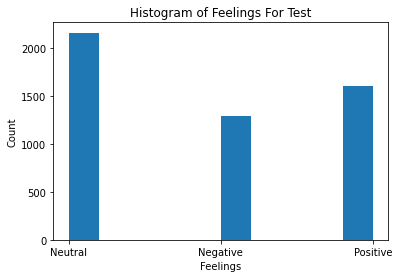

In [ ]:
labels = data_loader_test.labels

plt.hist(labels)
plt.xticks([1, 0, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Feelings')
plt.ylabel('Count')
plt.title('Histogram of Feelings For Test')
plt.show()

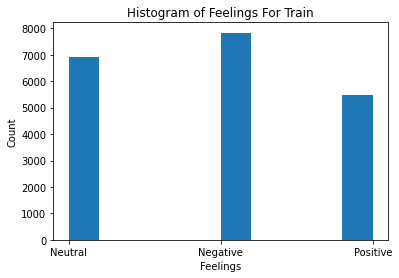

In [ ]:
labels = data_loader_train.labels

plt.hist(labels)
plt.xticks([1, 0, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Feelings')
plt.ylabel('Count')
plt.title('Histogram of Feelings For Train')
plt.show()

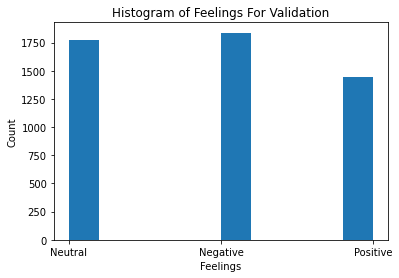

In [ ]:
labels = data_loader_val.labels

plt.hist(labels)
plt.xticks([1, 0, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Feelings')
plt.ylabel('Count')
plt.title('Histogram of Feelings For Validation')
plt.show()

# **Part B**

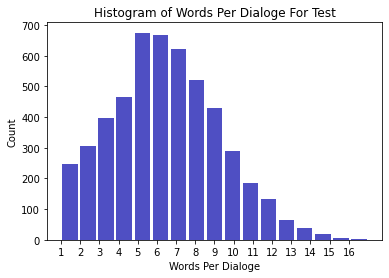


Mean: 6.3039
Variance: 8.8928


In [ ]:
dialoges = data_loader_test.dialoges
n_words = [len(dialoge.split(' ')) for dialoge in dialoges]
plt.hist(n_words, color='#0504aa', bins=17, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(1, 17))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Words Per Dialoge For Test')
plt.show()

print("\nMean: %.4f" %(np.mean(n_words)))
print("Variance: %.4f" %(np.std(n_words) ** 2))

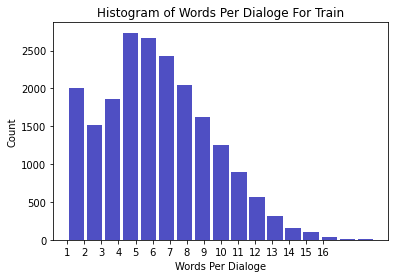


Mean: 6.4644
Variance: 9.2473


In [ ]:
dialoges = data_loader_train.dialoges
n_words = [len(dialoge.split(' ')) for dialoge in dialoges]
plt.hist(n_words, color='#0504aa', bins=17, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(1, 17))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Words Per Dialoge For Train')
plt.show()

print("\nMean: %.4f" %(np.mean(n_words)))
print("Variance: %.4f" %(np.std(n_words) ** 2))

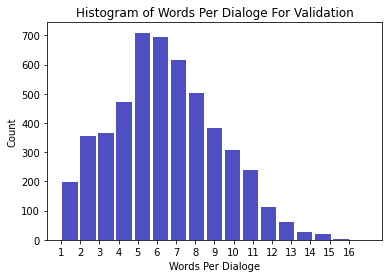


Mean: 6.3103
Variance: 8.6308


In [ ]:
dialoges = data_loader_val.dialoges
n_words = [len(dialoge.split(' ')) for dialoge in dialoges]
plt.hist(n_words, color='#0504aa', bins=17, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(1, 17))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Words Per Dialoge For Validation')
plt.show()

print("\nMean: %.4f" %(np.mean(n_words)))
print("Variance: %.4f" %(np.std(n_words) ** 2))

# **Part C**

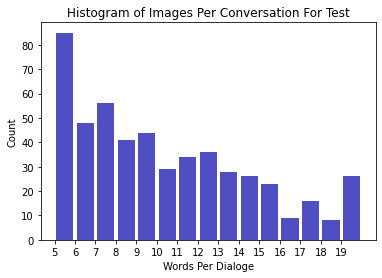


Mean: 9.9548
Variance: 17.7524


In [ ]:
indexes = data_loader_test.indexes
n_images = [np.count_nonzero(np.array(indexes) == i) for i in range(max(indexes))]
plt.hist(n_images, color='#0504aa', bins=15, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(5, 20))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Images Per Conversation For Test')
plt.show()

print("\nMean: %.4f" %(np.mean(n_images)))
print("Variance: %.4f" %(np.std(n_images) ** 2))

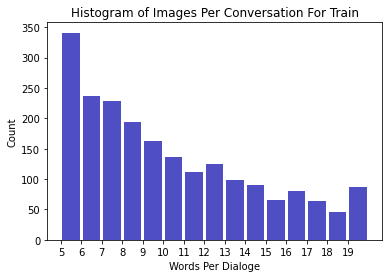


Mean: 9.7967
Variance: 17.6963


In [ ]:
indexes = data_loader_train.indexes
n_images = [np.count_nonzero(np.array(indexes) == i) for i in range(max(indexes))]
plt.hist(n_images, color='#0504aa', bins=15, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(5, 20))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Images Per Conversation For Train')
plt.show()

print("\nMean: %.4f" %(np.mean(n_images)))
print("Variance: %.4f" %(np.std(n_images) ** 2))

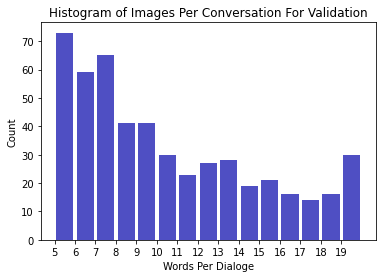


Mean: 10.0517
Variance: 19.2737


In [ ]:
indexes = data_loader_val.indexes
n_images = [np.count_nonzero(np.array(indexes) == i) for i in range(max(indexes))]
plt.hist(n_images, color='#0504aa', bins=15, alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(5, 20))
plt.xlabel('Words Per Dialoge')
plt.ylabel('Count')
plt.title('Histogram of Images Per Conversation For Validation')
plt.show()

print("\nMean: %.4f" %(np.mean(n_images)))
print("Variance: %.4f" %(np.std(n_images) ** 2))

# **Part D**

In [87]:
!pip install facenet-pytorch

from facenet_pytorch import MTCNN
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

mtcnn = MTCNN(keep_all=True, device=device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.4 MB/s eta 0:00:00
cuda


For reducing the computions, we just check one out of each ten images!

In [150]:
n_faces = []
N = data_loader_train.__len__()
for i in range(0, N, 10):
    frame, _, _ = data_loader_train.__getitem__(i)
    boxes, _ = mtcnn.detect(frame)
    if boxes is not None:
        n_faces.append(boxes.shape[0])
    else:
        n_faces.append(0)
    if i % 100 == 0:
        clear_output()
        print(f'{i} / {N}')

20200 / 20240


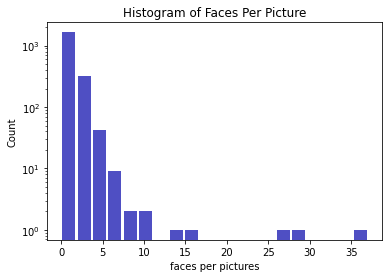


Mean: 1.5156
Variance: 2.9195


In [151]:
plt.hist(n_faces, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.gca().set_yscale("log")
plt.xlabel('faces per pictures')
plt.ylabel('Count')
plt.title('Histogram of Faces Per Picture')
plt.show()

print("\nMean: %.4f" %(np.mean(nn_faces)))
print("Variance: %.4f" %(np.std(nn_faces) ** 2))

maximum faces has found in index 6980 with 37 faces.


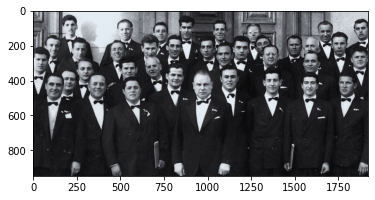

In [148]:
max_faces = np.max(n_faces)
argmax_i = 10 * np.argmax(n_faces)

print(f'maximum faces has found in index {argmax_i} with {max_faces} faces.')

img,_,_ = data_loader_train.__getitem__(argmax_i)
box, _ = mtcnn.detect(img)
plt.imshow(img)

# **Part E**

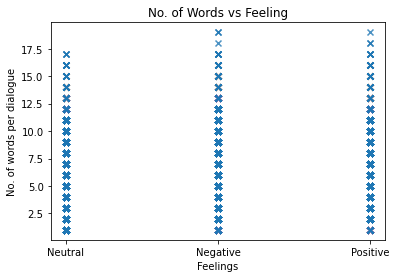

In [156]:
labels = data_loader_train.labels
dialoges = data_loader_train.dialoges
n_words = [len(dialoge.split(' ')) for dialoge in dialoges]

plt.scatter(labels, n_words, cmap='viridis', alpha=0.8, marker='x')
plt.xticks([1, 0, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Feelings')
plt.ylabel('No. of words per dialogue')
plt.title('No. of Words vs Feeling')
plt.show()

# **Part F**

In [16]:
def emotion_sequence(emotions):
    sequence = [emotions[0]]
    for i in range(1, len(emotions)):
        if emotions[i] != emotions[i - 1]:
            sequence.append(emotions[i])
    return sequence

labels = np.array(data_loader_train.labels)
indexes = data_loader_train.indexes
emotions_sequence = [emotion_sequence(labels[np.array(indexes) == i]) for i in range(max(indexes))]

uniqe_emotions_sequence = {}
for i in range(len(emotions_sequence)):
    uniqe_emotions_sequence[str(emotions_sequence[i])] = uniqe_emotions_sequence.get(str(emotions_sequence[i]), 0) + 1

print(f'number of classes: {len(list(uniqe_emotions_sequence.keys()))}')

number of classes: 681


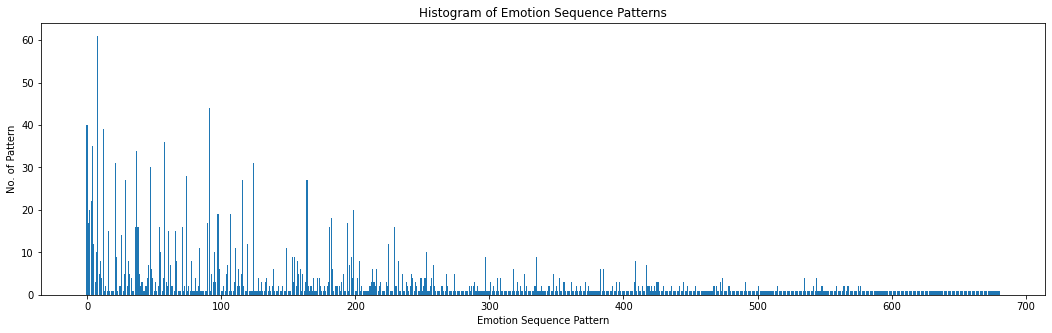

In [14]:
plt.figure(figsize=(18,5))
plt.bar(range(len(uniqe_emotions_sequence.keys())), uniqe_emotions_sequence.values(), width=0.8)

plt.xlabel('Emotion Sequence Pattern')
plt.ylabel('No. of Pattern')
plt.title('Histogram of Emotion Sequence Patterns')
plt.show()

# **Part G**

In [171]:
indexes = data_loader_train.indexes

n_dialogues = [np.count_nonzero(np.array(indexes) == i) for i in range(max(indexes))]

print(f'Average No. of dialogues per conversation: {(np.mean(n_dialogues))}')

Average No. of dialogues per conversation: 9.798062953995158


If there are approximately 9 dialogues per conversation, then we can calculate all possible sequences of emotions with $3^9$. But we have removed repeated emotions which come toghether in a sequence. Therefore we should calculate the No. of samples in this way:

For no removed emotion, we have 9 emotions: $ 3 \times 2^8 $

For 1 removed emotion, we have 8 emotions: $ 3 \times 2^7 $

...

For 9 removed emotion, we have 1 emotion: $ 3 $

$$ ⟹ 3 \times (2^8 + 2^7 + ... + 1) = 3 \times(2^9 + 1) = 1533 $$

The No. of classes we reached at the previous section was 681. By comparing this value with the result obtained from theory, it can be conclude that so many sequence of emotions do not occare in a real conversation or they're extremely unlikely.